imports

In [61]:
import pandas as pd
import requests
from bs4 import BeautifulSoup as bs
import json
import numpy as np
import time
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

urls

In [62]:
wiki_url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
sec_url = 'https://www.sec.gov/files/company_tickers.json'
cik_url = 'https://www.sec.gov/Archives/edgar/cik-lookup-data.txt'

request tickers

In [63]:
r = requests.get(wiki_url)
print(r)

<Response [200]>


beautiful soup

In [64]:
root = bs(r.content, "html")
table = pd.read_html(root.find('table').prettify())[0]
table.head()

/tmp/ipython-input-64-1283966118.py:2: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(root.find('table').prettify())[0]


Symbol             Security            GICS  Sector  \
0    MMM                   3M             Industrials   
1    AOS          A. O. Smith             Industrials   
2    ABT  Abbott Laboratories             Health Care   
3   ABBV               AbbVie             Health Care   
4    ACN            Accenture  Information Technology   

                GICS Sub-Industry    Headquarters Location  Date added  \
0        Industrial Conglomerates    Saint Paul, Minnesota  1957-03-04   
1               Building Products   Milwaukee  , Wisconsin  2017-07-26   
2           Health Care Equipment  North Chicago, Illinois  1957-03-04   
3                   Biotechnology  North Chicago, Illinois  2012-12-31   
4  IT Consulting & Other Services        Dublin  , Ireland  2011-07-06   

       CIK      Founded  
0    66740         1902  
1    91142         1916  
2     1800         1888  
3  1551152  2013 (1888)  
4  1467373         1989

parse out the tickers and ciks

In [65]:
tickers = table["Symbol"]
tickers

0       MMM
1       AOS
2       ABT
3      ABBV
4       ACN
       ... 
498     XYL
499     YUM
500    ZBRA
501     ZBH
502     ZTS
Name: Symbol, Length: 503, dtype: object

In [66]:
ciks = [str(i).rjust(10, '0') for i in table["CIK"]]
print(ciks)
ciks = pd.Series(ciks)
ciks

['0000066740', '0000091142', '0000001800', '0001551152', '0001467373', '0000796343', '0000002488', '0000874761', '0000004977', '0001090872', '0000002969', '0001559720', '0001086222', '0000915913', '0001035443', '0001097149', '0001579241', '0000352541', '0000899051', '0001652044', '0001652044', '0000764180', '0001018724', '0001748790', '0001002910', '0000004904', '0000004962', '0000005272', '0001053507', '0001410636', '0000820027', '0001037868', '0000318154', '0000820313', '0000006281', '0001013462', '0000315293', '0001841666', '0001858681', '0000320193', '0000006951', '0001521332', '0000947484', '0000007084', '0001596532', '0000354190', '0001267238', '0000732717', '0000731802', '0000769397', '0000008670', '0000866787', '0000915912', '0000008818', '0001069183', '0001701605', '0000009389', '0000070858', '0000010456', '0000010795', '0001067983', '0000764478', '0000842023', '0000875045', '0002012383', '0001393818', '0001390777', '0000012927', '0001075531', '0000885725', '0000014272', '0001

0      0000066740
1      0000091142
2      0000001800
3      0001551152
4      0001467373
          ...    
498    0001524472
499    0001041061
500    0000877212
501    0001136869
502    0001555280
Length: 503, dtype: object

add tickers and ciks to the dataframe

In [67]:
df = pd.DataFrame(tickers)
df["ciks"] = ciks
print(df)

    Symbol        ciks
0      MMM  0000066740
1      AOS  0000091142
2      ABT  0000001800
3     ABBV  0001551152
4      ACN  0001467373
..     ...         ...
498    XYL  0001524472
499    YUM  0001041061
500   ZBRA  0000877212
501    ZBH  0001136869
502    ZTS  0001555280

[503 rows x 2 columns]


Get dividend history for each CIK

In [68]:
header = {
    "User-Agent": "scheruvu@umd.edu"
}

indiv_files = []
symbols = []
int_gotten = 0
curr = 0

#for thing in df.values[::10]:
#  address = "https://data.sec.gov/api/xbrl/companyfacts/CIK" + thing[1] + ".json"
  #print(address)
#  response = requests.get(address, headers=header).json()
#  try:
#      indiv_files.append(response["facts"]["us-gaap"]["CommonStockDividendsPerShareCashPaid"]["units"]["USD/shares"])
#  except:
#      indiv_files.append("N/A")

while int_gotten < 50:
  address = "https://data.sec.gov/api/xbrl/companyfacts/CIK" + df.values[curr][1] + ".json"
  response = requests.get(address, headers=header).json()
  try:
      indiv_files.append(response["facts"]["us-gaap"]["CommonStockDividendsPerShareCashPaid"]["units"]["USD/shares"])
      symbols.append(df[df["ciks"] == df.values[curr][1]]["Symbol"].values[0])
      int_gotten += 1
      curr += 1
  except:
      curr += 1

indiv_files

[[{'start': '2007-01-01',
   'end': '2007-12-31',
   'val': 1.92,
   'accn': '0001104659-10-007295',
   'fy': 2009,
   'fp': 'FY',
   'form': '10-K',
   'filed': '2010-02-16'},
  {'start': '2007-01-01',
   'end': '2007-12-31',
   'val': 1.92,
   'accn': '0001104659-10-029054',
   'fy': 2009,
   'fp': 'FY',
   'form': '8-K',
   'filed': '2010-05-17',
   'frame': 'CY2007'},
  {'start': '2008-01-01',
   'end': '2008-06-30',
   'val': 1,
   'accn': '0001104659-09-046329',
   'fy': 2009,
   'fp': 'Q2',
   'form': '10-Q',
   'filed': '2009-07-31'},
  {'start': '2008-04-01',
   'end': '2008-06-30',
   'val': 0.5,
   'accn': '0001104659-09-046329',
   'fy': 2009,
   'fp': 'Q2',
   'form': '10-Q',
   'filed': '2009-07-31',
   'frame': 'CY2008Q2'},
  {'start': '2008-01-01',
   'end': '2008-09-30',
   'val': 1.5,
   'accn': '0001104659-09-061503',
   'fy': 2009,
   'fp': 'Q3',
   'form': '10-Q',
   'filed': '2009-10-30'},
  {'start': '2008-07-01',
   'end': '2008-09-30',
   'val': 0.5,
   'accn':

Get start date, end date, and per-share value

In [69]:
#date_stamps = indiv_files[0][0]['val']
#date_stamps = [[j['start'], j['end'], j['val']] for j in indiv_files[0]]
date_stamps = [[[j['start'], j['end'], j['val']] for j in i if ("-12-31" in j['end']) and ("-01-01" in j['start']) and ("frame" in j.keys()) and (j['frame'] == "CY" + j['end'][:4])] for i in indiv_files]
date_stamps

[[['2007-01-01', '2007-12-31', 1.92],
  ['2008-01-01', '2008-12-31', 2],
  ['2009-01-01', '2009-12-31', 2.04],
  ['2012-01-01', '2012-12-31', 2.36],
  ['2013-01-01', '2013-12-31', 2.54],
  ['2014-01-01', '2014-12-31', 3.42],
  ['2015-01-01', '2015-12-31', 4.1],
  ['2016-01-01', '2016-12-31', 4.44],
  ['2017-01-01', '2017-12-31', 4.7]],
 [['2009-01-01', '2009-12-31', 0.51],
  ['2010-01-01', '2010-12-31', 0.54],
  ['2011-01-01', '2011-12-31', 0.3],
  ['2012-01-01', '2012-12-31', 0.36],
  ['2013-01-01', '2013-12-31', 0.46],
  ['2014-01-01', '2014-12-31', 0.3],
  ['2015-01-01', '2015-12-31', 0.38],
  ['2016-01-01', '2016-12-31', 0.48],
  ['2017-01-01', '2017-12-31', 0.56],
  ['2018-01-01', '2018-12-31', 0.76],
  ['2019-01-01', '2019-12-31', 0.9],
  ['2020-01-01', '2020-12-31', 0.98],
  ['2021-01-01', '2021-12-31', 1.06],
  ['2022-01-01', '2022-12-31', 1.14],
  ['2023-01-01', '2023-12-31', 1.22]],
 [['2016-01-01', '2016-12-31', 2.35],
  ['2017-01-01', '2017-12-31', 2.63],
  ['2018-01-01', '

Create pandas DataFrame

In [70]:
to_transform = []

for x in range(len(date_stamps)):
  for y in range(len(date_stamps[x])):
    to_transform.append(date_stamps[x][y] + [symbols[x]])

to_transform = np.array(to_transform)
final_df = pd.DataFrame({"Start": to_transform[:, 0], "End": to_transform[:, 1], "Value": to_transform[:, 2], "Symbol": to_transform[:, 3]})

final_df

Start         End Value Symbol
0    2007-01-01  2007-12-31  1.92    MMM
1    2008-01-01  2008-12-31     2    MMM
2    2009-01-01  2009-12-31  2.04    MMM
3    2012-01-01  2012-12-31  2.36    MMM
4    2013-01-01  2013-12-31  2.54    MMM
..          ...         ...   ...    ...
285  2020-01-01  2020-12-31  0.96    CHD
286  2021-01-01  2021-12-31  1.01    CHD
287  2022-01-01  2022-12-31  1.05    CHD
288  2023-01-01  2023-12-31  1.09    CHD
289  2024-01-01  2024-12-31  1.13    CHD

[290 rows x 4 columns]

Hypothesis 1: The 50 stocks we selected from the S&P 500 have issued more dividends than the mean as compared to the stocks we did not select for analysisax1.set_xlabel("Z-score") **bold text**

Filter out the S&P 500 ciks we have not selected

In [71]:
non_sp500_ciks_isin = ~df['Symbol'].isin(symbols)
non_sp500_df = df[['Symbol','ciks']][non_sp500_ciks_isin]
display(non_sp500_df)
#generate the S&P 500 mean
#run z-test

Symbol        ciks
2      ABT  0000001800
5     ADBE  0000796343
6      AMD  0000002488
10     APD  0000002969
11    ABNB  0001559720
..     ...         ...
498    XYL  0001524472
499    YUM  0001041061
500   ZBRA  0000877212
501    ZBH  0001136869
502    ZTS  0001555280

[453 rows x 2 columns]

Get 500 non-S&P 500 filings at random

In [72]:
indiv_files_non_sp_500 = []
symbols_non_sp_500 = []
int_gotten = 0
curr = 0
non_sp500_ciks_length = non_sp500_df['Symbol'].size

#for thing in df.values[::10]:
#  address = "https://data.sec.gov/api/xbrl/companyfacts/CIK" + thing[1] + ".json"
  #print(address)
#  response = requests.get(address, headers=header).json()
#  try:
#      indiv_files.append(response["facts"]["us-gaap"]["CommonStockDividendsPerShareCashPaid"]["units"]["USD/shares"])
#  except:
#      indiv_files.append("N/A")

while int_gotten < 50:
  print(str(int_gotten) + "/50")
  address = "https://data.sec.gov/api/xbrl/companyfacts/CIK" + non_sp500_df.values[curr][1] + ".json"
  response = requests.get(address, headers=header).json()
  time.sleep(0.1)
  try:
      indiv_files_non_sp_500.append(response["facts"]["us-gaap"]["CommonStockDividendsPerShareCashPaid"]["units"]["USD/shares"])
      symbols_non_sp_500.append(df[df["ciks"] == non_sp500_df.values[curr][1]]["Symbol"].values[0])
      int_gotten += 1
      curr += 1
  except:
      curr += 1

indiv_files_non_sp_500

0/50
0/50
0/50
0/50
0/50
0/50
0/50
0/50
0/50
0/50
0/50
0/50
0/50
0/50
0/50
0/50
0/50
0/50
0/50
0/50
0/50
0/50
0/50
0/50
0/50
0/50
0/50
0/50
0/50
0/50
0/50
0/50
0/50
0/50
0/50
0/50
0/50
0/50
0/50
0/50
0/50
0/50
0/50
0/50
0/50
0/50
0/50
0/50
0/50
0/50
0/50
0/50
0/50
0/50
0/50
0/50
1/50
2/50
2/50
3/50
4/50
5/50
5/50
6/50
7/50
7/50
7/50
7/50
8/50
9/50
10/50
10/50
10/50
11/50
11/50
12/50
12/50
12/50
12/50
13/50
14/50
14/50
15/50
16/50
17/50
18/50
18/50
19/50
19/50
19/50
19/50
19/50
20/50
21/50
21/50
22/50
22/50
23/50
23/50
24/50
24/50
25/50
26/50
26/50
27/50
28/50
29/50
29/50
29/50
30/50
30/50
31/50
31/50
31/50
31/50
31/50
32/50
33/50
34/50
34/50
34/50
35/50
35/50
36/50
37/50
38/50
38/50
38/50
39/50
40/50
40/50
40/50
41/50
42/50
43/50
44/50
45/50
46/50
47/50
47/50
48/50
49/50


[[{'start': '2008-06-01',
   'end': '2009-05-31',
   'val': 0.47,
   'accn': '0001047469-11-006745',
   'fy': 2011,
   'fp': 'FY',
   'form': '10-K',
   'filed': '2011-07-29',
   'frame': 'CY2008'},
  {'start': '2009-06-01',
   'end': '2010-02-28',
   'val': 0.48,
   'accn': '0001104659-11-019252',
   'fy': 2011,
   'fp': 'Q3',
   'form': '10-Q',
   'filed': '2011-04-08'},
  {'start': '2009-12-01',
   'end': '2010-02-28',
   'val': 0.48,
   'accn': '0001104659-11-019252',
   'fy': 2011,
   'fp': 'Q3',
   'form': '10-Q',
   'filed': '2011-04-08',
   'frame': 'CY2010Q1'},
  {'start': '2009-06-01',
   'end': '2010-05-31',
   'val': 0.48,
   'accn': '0001047469-11-006745',
   'fy': 2011,
   'fp': 'FY',
   'form': '10-K',
   'filed': '2011-07-29',
   'frame': 'CY2009'},
  {'start': '2010-06-01',
   'end': '2010-11-30',
   'val': 0.49,
   'accn': '0001104659-11-000787',
   'fy': 2011,
   'fp': 'Q2',
   'form': '10-Q',
   'filed': '2011-01-07'},
  {'start': '2010-09-01',
   'end': '2010-11-30

Create non selected dataframe



In [73]:
non_sp500_df = pd.DataFrame({'symbols':symbols_non_sp_500,'dividends':indiv_files_non_sp_500})
non_sp500_df['sum'] = non_sp500_df['dividends'].apply(lambda d: len(d))
non_sp500_df

symbols                                          dividends  sum
0     CTAS  [{'start': '2008-06-01', 'end': '2009-05-31', ...    8
1     CSCO  [{'start': '2011-03-01', 'end': '2011-03-17', ...  177
2      CFG  [{'start': '2012-01-01', 'end': '2012-12-31', ...   63
3      CLX  [{'start': '2008-07-01', 'end': '2009-06-30', ...   45
4      CME  [{'start': '2007-01-01', 'end': '2007-12-31', ...  131
5       KO  [{'start': '2007-01-01', 'end': '2007-12-31', ...   82
6     CTSH  [{'start': '2017-04-01', 'end': '2017-06-30', ...   21
7      CAG  [{'start': '2009-06-01', 'end': '2009-08-30', ...   82
8      COP  [{'start': '2008-01-01', 'end': '2008-06-30', ...  167
9       ED  [{'start': '2016-01-01', 'end': '2016-12-31', ...   92
10     COO  [{'start': '2011-01-08', 'end': '2011-02-07', ...  145
11     GLW  [{'start': '2017-01-01', 'end': '2017-12-31', ...   27
12    COST  [{'start': '2007-09-03', 'end': '2008-08-31', ...   80
13    CTRA  [{'start': '2009-01-01', 'end': '2009-12-31', ...  206
14     CCI  [{'start': '2014-01-01', 'end': '2014-03-31', ...  106
15     CSX  [{'start': '2006-12-30', 'end': '2007-12-28', ...  232
16     CMI  [{'start': '2017-01-01', 'end': '2017-04-02', ...   98
17     CVS  [{'start': '2017-01-01', 'end': '2017-03-31', ...   20
18     DRI  [{'start': '2009-06-01', 'end': '2009-08-30', ...   80
19      DE  [{'start': '2008-11-01', 'end': '2009-01-31', ...  255
20    DELL  [{'start': '2022-01-29', 'end': '2022-04-29', ...   32
21     DVN  [{'start': '2008-01-01', 'end': '2008-12-31', ...  271
22    FANG  [{'start': '2021-01-01', 'end': '2021-03-31', ...   48
23      DG  [{'start': '2009-01-31', 'end': '2010-01-29', ...  195
24       D  [{'start': '2007-01-01', 'end': '2007-12-31', ...  184
25     DPZ  [{'start': '2012-01-02', 'end': '2012-12-30', ...    3
26     DOV  [{'start': '2007-01-01', 'end': '2007-12-31', ...  211
27     DOW  [{'start': '2016-01-01', 'end': '2016-12-31', ...   21
28     DHI  [{'start': '2015-10-01', 'end': '2015-12-31', ...  197
29      DD  [{'start': '2017-01-01', 'end': '2017-12-31', ...    4
30     ETN  [{'start': '2010-01-01', 'end': '2010-12-31', ...   16
31      EA  [{'start': '2020-04-01', 'end': '2021-03-31', ...   11
32     ELV  [{'start': '2011-01-01', 'end': '2011-03-31', ...  233
33     EMR  [{'start': '2007-10-01', 'end': '2008-06-30', ...  310
34     EOG  [{'start': '2015-01-01', 'end': '2015-12-31', ...    4
35     EQT  [{'start': '2007-01-01', 'end': '2007-12-31', ...  100
36     EFX  [{'start': '2008-01-01', 'end': '2008-12-31', ...  200
37    EQIX  [{'end': '2015-02-19', 'val': 1.69, 'accn': '0...  205
38     ESS  [{'start': '2018-01-01', 'end': '2018-03-31', ...   68
39      EL  [{'end': '2016-09-15', 'val': 0.3, 'accn': '00...    1
40      ES  [{'start': '2014-01-01', 'end': '2014-12-31', ...   97
41     EXC  [{'start': '2008-01-01', 'end': '2008-06-30', ...  118
42     EXE  [{'start': '2011-01-01', 'end': '2011-12-31', ...   16
43    EXPE  [{'start': '2012-01-01', 'end': '2012-03-31', ...   16
44    EXPD  [{'start': '2007-01-01', 'end': '2007-12-31', ...  146
45     EXR  [{'start': '2008-01-01', 'end': '2008-12-31', ...  201
46     XOM  [{'start': '2008-01-01', 'end': '2008-06-30', ...  208
47     FDS  [{'start': '2012-06-01', 'end': '2012-06-30', ...   36
48    FICO  [{'start': '2007-10-01', 'end': '2008-09-30', ...   22
49    FAST  [{'start': '2008-01-01', 'end': '2008-12-31', ...  375

Create selected dataframe

In [74]:
sp500_df = pd.DataFrame({'symbols':symbols,'dividends':indiv_files})
sp500_df['sum'] = sp500_df['dividends'].apply(lambda d: len(d))
sp500_df

symbols                                          dividends  sum
0      MMM  [{'start': '2007-01-01', 'end': '2007-12-31', ...  156
1      AOS  [{'start': '2009-01-01', 'end': '2009-06-30', ...  188
2     ABBV  [{'end': '2015-02-19', 'val': 0.51, 'accn': '0...   57
3      ACN  [{'start': '2007-09-01', 'end': '2008-08-31', ...  228
4      AES  [{'start': '2013-01-01', 'end': '2013-03-31', ...  119
5      AFL  [{'start': '2009-01-01', 'end': '2009-03-31', ...  164
6        A  [{'start': '2011-11-01', 'end': '2012-01-31', ...  129
7     ALLE  [{'start': '2018-01-01', 'end': '2018-12-31', ...   77
8      LNT  [{'start': '2008-01-01', 'end': '2008-12-31', ...   45
9      ALL  [{'start': '2008-01-01', 'end': '2008-12-31', ...   12
10      MO  [{'start': '2008-01-01', 'end': '2008-12-31', ...   18
11     AEE  [{'start': '2007-01-01', 'end': '2007-12-31', ...  209
12     AEP  [{'start': '2007-01-01', 'end': '2007-12-31', ...   24
13     AIG  [{'start': '2013-09-25', 'end': '2013-09-26', ...  195
14     AMT  [{'end': '2021-02-02', 'val': 1.21, 'accn': '0...   20
15     AWK  [{'start': '2010-01-01', 'end': '2010-03-31', ...  168
16     AMP  [{'start': '2007-01-01', 'end': '2007-12-31', ...   42
17     AME  [{'start': '2008-01-01', 'end': '2008-06-30', ...  254
18    AMGN  [{'start': '2010-01-01', 'end': '2010-09-30', ...  301
19     APH  [{'start': '2011-01-01', 'end': '2011-03-31', ...    7
20     ADI  [{'start': '2006-10-29', 'end': '2007-11-03', ...  285
21     AON  [{'start': '2007-01-01', 'end': '2007-12-31', ...  204
22    AAPL  [{'start': '2012-09-30', 'end': '2013-03-30', ...    1
23    AMAT  [{'start': '2009-10-26', 'end': '2010-01-31', ...    2
24    APTV  [{'start': '2016-01-01', 'end': '2016-03-31', ...  103
25     ADM  [{'start': '2007-07-01', 'end': '2008-06-30', ...  176
26     AIZ  [{'start': '2007-01-01', 'end': '2007-12-31', ...  120
27     ATO  [{'start': '2008-10-01', 'end': '2009-09-30', ...  221
28    BALL  [{'start': '2008-01-01', 'end': '2008-12-31', ...  198
29     BAC  [{'start': '2007-01-01', 'end': '2007-12-31', ...  174
30     BAX  [{'start': '2015-04-01', 'end': '2015-04-30', ...   20
31     BDX  [{'start': '2007-10-01', 'end': '2008-06-30', ...   37
32    TECH  [{'start': '2008-07-01', 'end': '2009-06-30', ...  114
33      BK  [{'start': '2007-01-01', 'end': '2007-12-31', ...  170
34      BA  [{'start': '2008-01-01', 'end': '2008-06-30', ...  114
35    AVGO  [{'start': '2015-11-02', 'end': '2016-10-30', ...   98
36     BRO  [{'start': '2010-01-01', 'end': '2010-12-31', ...  121
37    BF.B  [{'start': '2009-05-01', 'end': '2009-07-31', ...  127
38      BG  [{'start': '2022-01-01', 'end': '2022-12-31', ...   13
39     BXP  [{'start': '2009-01-01', 'end': '2009-12-31', ...  249
40     COF  [{'start': '2007-01-01', 'end': '2007-12-31', ...   63
41     CAH  [{'start': '2007-07-01', 'end': '2008-06-30', ...   48
42    CBOE  [{'start': '2011-01-01', 'end': '2011-06-30', ...   37
43     CDW  [{'start': '2013-01-01', 'end': '2013-03-31', ...  203
44     COR  [{'start': '2007-10-01', 'end': '2008-09-30', ...  109
45     CNP  [{'start': '2015-01-01', 'end': '2015-12-31', ...   12
46      CF  [{'start': '2007-01-01', 'end': '2007-12-31', ...  142
47     CVX  [{'start': '2008-01-01', 'end': '2008-03-31', ...   79
48     CHD  [{'start': '2008-01-01', 'end': '2008-12-31', ...  195
49      CI  [{'end': '2019-04-10', 'val': 0.04, 'accn': '0...   78

Create a z-score then bin the z-score for both the selected and non selected

In [75]:
non_sp500_df['z-score'] = non_sp500_df['sum'].apply(lambda s: (s - non_sp500_df['sum'].mean())/non_sp500_df['sum'].std())
sp500_df['z-score'] = sp500_df['sum'].apply(lambda s: (s - sp500_df['sum'].mean())/sp500_df['sum'].std())
def bin_z_score(z):
  if z < -3.0:
    return '-3.5'
  elif z >= -3.0 and z < -2.5:
    return '-3.0'
  elif z >= -2.5 and z < -2.0:
    return '-2.5'
  elif z >= -2.0 and z < -1.5:
    return '-2.0'
  elif z >= -1.5 and z < -1.0:
    return '-1.5'
  elif z >= -1.0 and z < -0.5:
    return '-1.0'
  elif z >= -0.5 and z < 0:
    return '-0.5'
  elif z >= 0 and z < 0.5:
    return '0.5'
  elif z >= 0.5 and z < 1.0:
    return '1.0'
  elif z >= 1.0 and z < 1.5:
    return '1.5'
  elif z >= 1.5 and z < 2.0:
    return '2.0'
  elif z >= 2.0 and z < 2.5:
    return '2.5'
  elif z >= 2.5 and z < 3.0:
    return '3.0'
  elif z > 3.0:
    return '3.5'
non_sp500_df['z-score-bin'] = non_sp500_df['z-score'].apply(lambda z: bin_z_score(z))
sp500_df['z-score-bin'] = sp500_df['z-score'].apply(lambda z: bin_z_score(z))
non_sp500_df
sp500_df

symbols                                          dividends  sum   z-score  \
0      MMM  [{'start': '2007-01-01', 'end': '2007-12-31', ...  156  0.453786   
1      AOS  [{'start': '2009-01-01', 'end': '2009-06-30', ...  188  0.841224   
2     ABBV  [{'end': '2015-02-19', 'val': 0.51, 'accn': '0...   57 -0.744849   
3      ACN  [{'start': '2007-09-01', 'end': '2008-08-31', ...  228  1.325520   
4      AES  [{'start': '2013-01-01', 'end': '2013-03-31', ...  119  0.005812   
5      AFL  [{'start': '2009-01-01', 'end': '2009-03-31', ...  164  0.550645   
6        A  [{'start': '2011-11-01', 'end': '2012-01-31', ...  129  0.126886   
7     ALLE  [{'start': '2018-01-01', 'end': '2018-12-31', ...   77 -0.502700   
8      LNT  [{'start': '2008-01-01', 'end': '2008-12-31', ...   45 -0.890138   
9      ALL  [{'start': '2008-01-01', 'end': '2008-12-31', ...   12 -1.289682   
10      MO  [{'start': '2008-01-01', 'end': '2008-12-31', ...   18 -1.217038   
11     AEE  [{'start': '2007-01-01', 'end': '2007-12-31', ...  209  1.095479   
12     AEP  [{'start': '2007-01-01', 'end': '2007-12-31', ...   24 -1.144393   
13     AIG  [{'start': '2013-09-25', 'end': '2013-09-26', ...  195  0.925976   
14     AMT  [{'end': '2021-02-02', 'val': 1.21, 'accn': '0...   20 -1.192823   
15     AWK  [{'start': '2010-01-01', 'end': '2010-03-31', ...  168  0.599075   
16     AMP  [{'start': '2007-01-01', 'end': '2007-12-31', ...   42 -0.926460   
17     AME  [{'start': '2008-01-01', 'end': '2008-06-30', ...  254  1.640313   
18    AMGN  [{'start': '2010-01-01', 'end': '2010-09-30', ...  301  2.209362   
19     APH  [{'start': '2011-01-01', 'end': '2011-03-31', ...    7 -1.350220   
20     ADI  [{'start': '2006-10-29', 'end': '2007-11-03', ...  285  2.015643   
21     AON  [{'start': '2007-01-01', 'end': '2007-12-31', ...  204  1.034942   
22    AAPL  [{'start': '2012-09-30', 'end': '2013-03-30', ...    1 -1.422864   
23    AMAT  [{'start': '2009-10-26', 'end': '2010-01-31', ...    2 -1.410757   
24    APTV  [{'start': '2016-01-01', 'end': '2016-03-31', ...  103 -0.187907   
25     ADM  [{'start': '2007-07-01', 'end': '2008-06-30', ...  176  0.695935   
26     AIZ  [{'start': '2007-01-01', 'end': '2007-12-31', ...  120  0.017919   
27     ATO  [{'start': '2008-10-01', 'end': '2009-09-30', ...  221  1.240768   
28    BALL  [{'start': '2008-01-01', 'end': '2008-12-31', ...  198  0.962298   
29     BAC  [{'start': '2007-01-01', 'end': '2007-12-31', ...  174  0.671720   
30     BAX  [{'start': '2015-04-01', 'end': '2015-04-30', ...   20 -1.192823   
31     BDX  [{'start': '2007-10-01', 'end': '2008-06-30', ...   37 -0.986997   
32    TECH  [{'start': '2008-07-01', 'end': '2009-06-30', ...  114 -0.054726   
33      BK  [{'start': '2007-01-01', 'end': '2007-12-31', ...  170  0.623290   
34      BA  [{'start': '2008-01-01', 'end': '2008-06-30', ...  114 -0.054726   
35    AVGO  [{'start': '2015-11-02', 'end': '2016-10-30', ...   98 -0.248444   
36     BRO  [{'start': '2010-01-01', 'end': '2010-12-31', ...  121  0.030026   
37    BF.B  [{'start': '2009-05-01', 'end': '2009-07-31', ...  127  0.102671   
38      BG  [{'start': '2022-01-01', 'end': '2022-12-31', ...   13 -1.277575   
39     BXP  [{'start': '2009-01-01', 'end': '2009-12-31', ...  249  1.579776   
40     COF  [{'start': '2007-01-01', 'end': '2007-12-31', ...   63 -0.672204   
41     CAH  [{'start': '2007-07-01', 'end': '2008-06-30', ...   48 -0.853815   
42    CBOE  [{'start': '2011-01-01', 'end': '2011-06-30', ...   37 -0.986997   
43     CDW  [{'start': '2013-01-01', 'end': '2013-03-31', ...  203  1.022835   
44     COR  [{'start': '2007-10-01', 'end': '2008-09-30', ...  109 -0.115263   
45     CNP  [{'start': '2015-01-01', 'end': '2015-12-31', ...   12 -1.289682   
46      CF  [{'start': '2007-01-01', 'end': '2007-12-31', ...  142  0.284282   
47     CVX  [{'start': '2008-01-01', 'end': '2008-03-31', ...   79 -0.478485   
48     CHD  [{'start': '2008-01-01', 'end': '2008-12-31', ...  195  0.925976   
49 

Plot the z-scores for both the selected and non-selected



z-score-bin
-1.5    10
1.0      9
-1.0     8
0.5      7
-0.5     7
1.5      5
2.0      2
2.5      2
Name: count, dtype: int64
z-score-bin
-1.0    10
-0.5    10
-1.5     9
1.0      9
0.5      4
1.5      4
2.0      2
2.5      1
3.0      1
Name: count, dtype: int64


Text(0, 0.5, 'frequency')

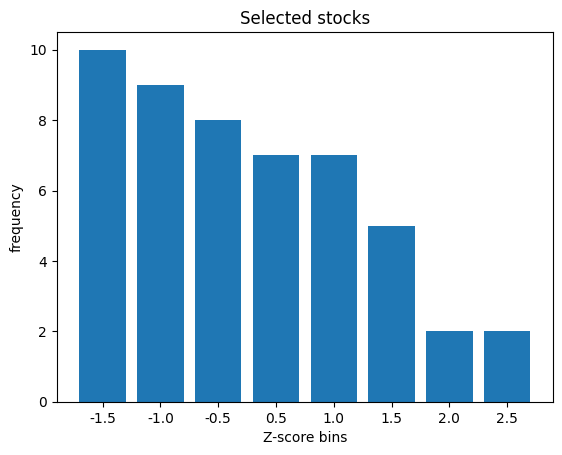

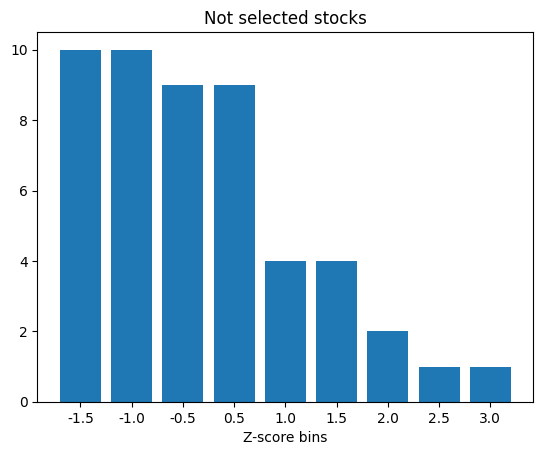

In [76]:
fig1, ax1 = plt.subplots()
print(sp500_df['z-score-bin'].value_counts())
ax1.set_title("Selected stocks")
ax1.bar(['-1.5','-1.0','-0.5','0.5','1.0','1.5','2.0','2.5'],sp500_df['z-score-bin'].value_counts(), label='Selected stocks z-score')
ax1.set_xlabel("Z-score bins")
ax1.set_ylabel("frequency")
fig2, ax2 = plt.subplots()
print(non_sp500_df['z-score-bin'].value_counts())
ax2.set_title("Not selected stocks")
ax2.bar(['-1.5','-1.0','-0.5','0.5','1.0','1.5','2.0','2.5','3.0'],non_sp500_df['z-score-bin'].value_counts(), label='Not selected stocks z-score')
ax2.set_xlabel("Z-score bins")
ax1.set_ylabel("frequency")



Conclusion 1: As there are more positive values  greater than the mean in the Selected stocks chart, the stocks we selected issued more dividends than the mean as compared to the stocks we did not select

In [77]:
# Hypothesis 2 Statement:

# The purpose of this analysis is to determine whether average dividends per share (DPS)
# have declined over time.

# Null Hypothesis (H₀): The average DPS from 2000 to 2010 is greater than or equal to the
# average DPS from 2015 to 2025.

# Alternative Hypothesis (H₁): The average DPS from 2000 to 2010 is greater than the
# average DPS from 2015 to 2025.

# We will perform a one-tailed independent two-sample T-test with a significance level of 0.05.


In [78]:
final_df['Year'] = pd.to_datetime(final_df['Start']).dt.year

In [79]:
early = final_df[(final_df['Year'] >= 2000) & (final_df['Year'] <= 2010)]['Value']
recent = final_df[(final_df['Year'] >= 2015) & (final_df['Year'] <= 2025)]['Value']
early = pd.to_numeric(early, errors='coerce').dropna().tolist()
recent = pd.to_numeric(recent, errors='coerce').dropna().tolist()

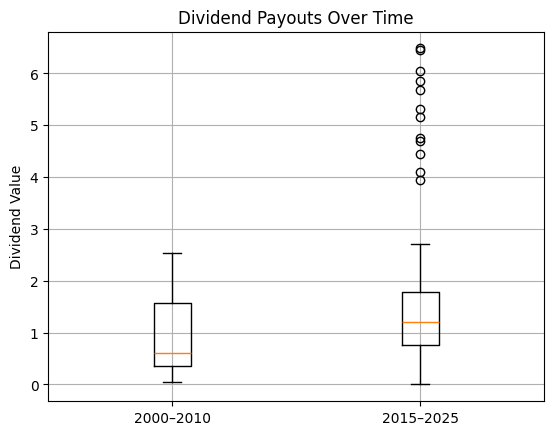

In [80]:
plt.boxplot([early, recent], tick_labels=["2000–2010", "2015–2025"])
plt.title("Dividend Payouts Over Time")
plt.ylabel("Dividend Value")
plt.grid(True)
plt.show()


In [81]:
# Run two-sample t-test
t_stat, p_val_two_tailed = ttest_ind(early, recent, equal_var=False)

# One-tailed p-value
p_val_one_tailed = p_val_two_tailed / 2

print("T-statistic:", t_stat)
print("One-tailed p-value:", p_val_one_tailed)

T-statistic: -4.083063858192542
One-tailed p-value: 3.6783380746164574e-05


In [82]:
alpha = 0.05
if p_val_one_tailed < alpha and t_stat > 0:
    print("Dividends have statistically significantly declined over time.")
else:
    print("No strong evidence of a decline in dividends.")


No strong evidence of a decline in dividends.


In [83]:
print("Mean 2000–2010:", np.mean(early))
print("Mean 2015–2025:", np.mean(recent))


Mean 2000–2010: 0.9230660377358492
Mean 2015–2025: 1.4732770949720668


In [84]:
# Conclusion 2: The dataset contains historical data on dividends per share (DPS) for various companies over time.
# To test whether average DPS has declined, we compared two periods: 2000–2010 and 2015–2025.
# Using a one-tailed independent two-sample t-test, we found that the mean DPS was actually higher in the more recent period.
# The test yielded a p-value greater than 0.05, and the direction of the difference did not support our hypothesis.
# Therefore, we fail to reject the null hypothesis and conclude that there is no strong statistical evidence
# that dividend payouts have declined over time.
# In fact, the data suggests that DPS may have slightly increased in the more recent decade.

Hypothesis 3

In [85]:
print(len(final_df))
print(len(final_df.drop_duplicates()))

290
290


So, there appear to be MANY duplicates in the data.  Let's remove all of them

In [86]:
final_df = final_df.drop_duplicates()
final_df

Start         End Value Symbol  Year
0    2007-01-01  2007-12-31  1.92    MMM  2007
1    2008-01-01  2008-12-31     2    MMM  2008
2    2009-01-01  2009-12-31  2.04    MMM  2009
3    2012-01-01  2012-12-31  2.36    MMM  2012
4    2013-01-01  2013-12-31  2.54    MMM  2013
..          ...         ...   ...    ...   ...
285  2020-01-01  2020-12-31  0.96    CHD  2020
286  2021-01-01  2021-12-31  1.01    CHD  2021
287  2022-01-01  2022-12-31  1.05    CHD  2022
288  2023-01-01  2023-12-31  1.09    CHD  2023
289  2024-01-01  2024-12-31  1.13    CHD  2024

[290 rows x 5 columns]

Much better! Now, let's check the distribution of years...

In [87]:
final_df['Year'] = pd.to_datetime(final_df['Start']).dt.year
#final_df['Year'].astype(str).describe()
vals = final_df['Year'].astype(str).value_counts()
vals = vals.sort_index()
vals

Year
2007    10
2008    15
2009    14
2010    14
2011    12
2012    15
2013    16
2014    15
2015    17
2016    18
2017    18
2018    17
2019    18
2020    17
2021    17
2022    20
2023    20
2024    17
Name: count, dtype: int64

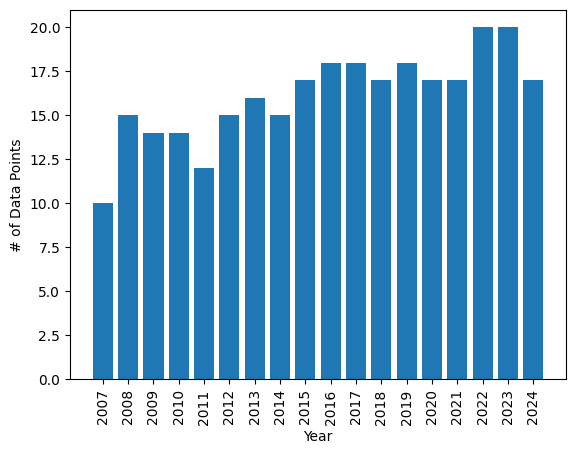

In [88]:
plt.bar(x=vals.index, height=vals.values)
plt.xticks(rotation=90)
plt.xlabel("Year")
plt.ylabel("# of Data Points")
plt.show()

There are 18 different years, with 2022 and 2015 as the most frequent, while 2007 and 2008 are the least frequent. The latter part makes sense, given that earlier on it's reasonable to expect for record-keeping to be smaller in scope. However, the number of datapoints for the more recent years appears to be mostly consistent.

Let's also analyze how many data points are there for each ticker.

In [89]:
vals = final_df["Symbol"].value_counts()
vals

Symbol
BAC     18
BK      18
LNT     17
BALL    17
CHD     17
AON     16
CF      16
AEE     15
BRO     15
AOS     15
CDW     12
ADM     12
AME     10
MMM      9
AIZ      8
ALLE     7
CBOE     7
COF      7
AFL      6
APTV     6
CNP      6
CVX      5
AEP      4
AIG      4
MO       4
AMP      4
ALL      3
ABBV     3
BG       3
AMT      3
BXP      2
AES      1
Name: count, dtype: int64

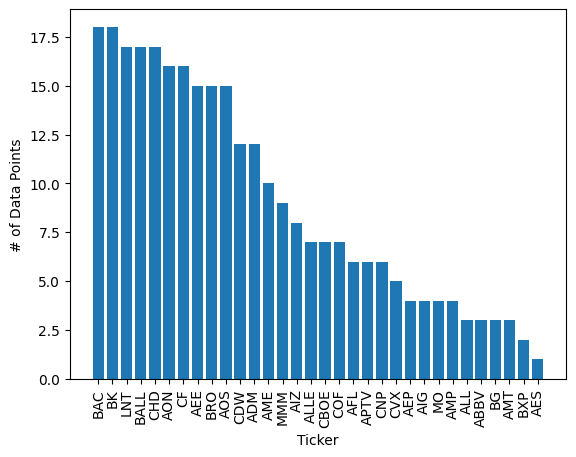

In [90]:
plt.bar(x=vals.index, height=vals.values)
plt.xticks(rotation=90)
plt.xlabel("Ticker")
plt.ylabel("# of Data Points")
plt.show()

There is a much greater spread in the amount of data points for each category when said category is tickers. "BAC" and "BK" have datapoints for all 18 years, while "AES" has only one! When it comes to the machine learning section of our project, it may be useful to take out the tickers that have less than "n" number of data points. After all, it would be rather difficult to predict based off of one time stamp!

One last thing... we want the span of time for each data point to be one fiscal year. In other words, we want the start years and the end years to be PERFECTLY correlated with each other.

In [91]:
final_df['End Year'] = pd.to_datetime(final_df['End']).dt.year
final_df[['Year', 'End Year']].corr()

Year  End Year
Year       1.0       1.0
End Year   1.0       1.0

Conclusion 3: Ones all around. Looks like we've got nothing to worry about!

In [98]:
len(final_df) - len(final_df[["End", "Symbol"]].drop_duplicates())

0

So for each ticker, we do not have any repeat years. That's good! Now, let's move on to the next part, and start working on the machine learning part!

[decide what model we're using]